In [23]:

import os
print('Current working directory:', os.getcwd())
print('files:', os.listdir())

Current working directory: /home/elvis/spotify_cleaning
files: ['venv', 'spotify_data', 'spotify,py', 'my_spotify_data .zip', 'spotiy.ipynb']


In [24]:
import zipfile
zip_path = "my_spotify_data .zip"
extract_path = "spotify_data"
with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_path)

In [25]:
for root, dirs, files in os.walk(extract_path):
    for file in files:
        print(os.path) #so this basically just shows what is in the extracted files 

<module 'posixpath' (frozen)>
<module 'posixpath' (frozen)>
<module 'posixpath' (frozen)>
<module 'posixpath' (frozen)>
<module 'posixpath' (frozen)>


In [20]:
!pip install pandas


In [ ]:
import os

subfolder = "spotify_data/Spotify Extended Streaming History"
print(" Files inside subfolder:", os.listdir(subfolder)) # so basically it just the sub folders inside the spotify_data folder and the extended streming history folder should be in json formart 




📄 Files inside subfolder: ['Streaming_History_Video_2023-2025.json', 'Streaming_History_Audio_2024-2025_2.json', 'ReadMeFirst_ExtendedStreamingHistory.pdf', 'Streaming_History_Audio_2023-2024_1.json', 'Streaming_History_Audio_2021-2023_0.json']


In [ ]:
import json
import pandas as pd
import os 

subfolder = "spotify_data/Spotify Extended Streaming History" # again referring to the subfolder from my_data earlier 
json_files = [f for f in os.listdir(subfolder) if f.endswith('.json')]

all_data = []

for filename in json_files:
    file_path = os.path.join(subfolder, filename)
    with open(file_path, 'r') as file:
        data = json.load(file)
        all_data.extend(data)  


In [44]:
audio_df = pd.DataFrame(all_data)


In [ ]:
import os
import json
import pandas as pd

subfolder = "spotify_data/Spotify Extended Streaming History" 
audio_files = [
    "Streaming_History_Audio_2021-2023_0.json",
    "Streaming_History_Audio_2023-2024_1.json",
    "Streaming_History_Audio_2024-2025_2.json"
]

audio_data = []
for file in audio_files:
    file_path = os.path.join(subfolder, file)
    with open(file_path, 'r', encoding='utf-8') as f:
        audio_data.extend(json.load(f))

audio_df = pd.DataFrame(audio_data)

video_file = os.path.join(subfolder, "Streaming_History_Video_2023-2025.json")
with open(video_file, 'r', encoding='utf-8') as f:
    video_data = json.load(f)

video_df = pd.DataFrame(video_data)

audio_df_clean = audio_df.copy()
audio_df_clean["timestamp"] = pd.to_datetime(audio_df_clean["ts"], errors='coerce')
audio_df_clean["minutes_played"] = audio_df_clean["ms_played"] / 60000
audio_df_clean["date"] = audio_df_clean["timestamp"].dt.date
audio_df_clean["hour"] = audio_df_clean["timestamp"].dt.hour
audio_df_clean["day_of_week"] = audio_df_clean["timestamp"].dt.day_name()
audio_df_clean = audio_df_clean.dropna(subset=["timestamp"])
audio_df_clean = audio_df_clean[audio_df_clean["minutes_played"] >= 0.1]
audio_df_clean["content_type"] = "audio"
audio_df_clean = audio_df_clean[[
    "timestamp", "date", "hour", "day_of_week", "minutes_played",
    "master_metadata_album_artist_name", "master_metadata_track_name",
    "platform", "content_type"
]]

video_df_clean = video_df.copy()
video_df_clean["timestamp"] = pd.to_datetime(video_df_clean["ts"], errors='coerce')
video_df_clean["minutes_played"] = video_df_clean["ms_played"] / 60000
video_df_clean["date"] = video_df_clean["timestamp"].dt.date
video_df_clean["hour"] = video_df_clean["timestamp"].dt.hour
video_df_clean["day_of_week"] = video_df_clean["timestamp"].dt.day_name()
video_df_clean = video_df_clean.dropna(subset=["timestamp"])
video_df_clean["content_type"] = "video"
video_df_clean = video_df_clean[[
    "timestamp", "date", "hour", "day_of_week", "minutes_played",
    "master_metadata_album_artist_name", "master_metadata_track_name",
    "platform", "content_type"
]]

combined_df = pd.concat([audio_df_clean, video_df_clean], ignore_index=True)

audio_df_clean.to_csv("audio_streaming_clean.csv", index=False)
video_df_clean.to_csv("video_streaming_clean.csv", index=False)
combined_df.to_csv("combined_spotify_clean.csv", index=False)

print("  CSV files saved successfully:")
print(" - audio_streaming_clean.csv")
print(" - video_streaming_clean.csv")
print(" - combined_spotify_clean.csv")
 #so here weve basically cleaned the data and created a csv file containing both audio and video
 


  CSV files saved successfully:
 - audio_streaming_clean.csv
 - video_streaming_clean.csv
 - combined_spotify_clean.csv


In [49]:
df = pd.read_csv("combined_spotify_clean.csv", parse_dates=["timestamp"])

df_info= df.info()
df_head = df.head()
df_info, df_head


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44061 entries, 0 to 44060
Data columns (total 9 columns):
 #   Column                             Non-Null Count  Dtype              
---  ------                             --------------  -----              
 0   timestamp                          44061 non-null  datetime64[ns, UTC]
 1   date                               44061 non-null  object             
 2   hour                               44061 non-null  int64              
 3   day_of_week                        44061 non-null  object             
 4   minutes_played                     44061 non-null  float64            
 5   master_metadata_album_artist_name  43624 non-null  object             
 6   master_metadata_track_name         43624 non-null  object             
 7   platform                           44061 non-null  object             
 8   content_type                       44061 non-null  object             
dtypes: datetime64[ns, UTC](1), float64(1), int64(1), ob

(None,
                   timestamp        date  hour day_of_week  minutes_played  \
 0 2021-03-29 11:22:08+00:00  2021-03-29    11      Monday        1.261833   
 1 2021-03-29 11:24:24+00:00  2021-03-29    11      Monday        0.708883   
 2 2021-03-29 11:26:36+00:00  2021-03-29    11      Monday        2.122850   
 3 2021-03-29 11:27:14+00:00  2021-03-29    11      Monday        0.559767   
 4 2021-03-29 11:27:27+00:00  2021-03-29    11      Monday        0.186933   
 
   master_metadata_album_artist_name        master_metadata_track_name  \
 0            Nviiri The Storyteller                         Niko Sawa   
 1                     PARTYNEXTDOOR                      PERSIAN RUGS   
 2                            H.E.R.                            Damage   
 3                      Romain Virgo                          Murderer   
 4                             Drake  Wants and Needs (feat. Lil Baby)   
 
                                             platform content_type  
 0  Andr

In [52]:
!pip install seaborn
!pip install matplotlib


  Using cached seaborn-0.13.2-py3-none-any.whl.metadata (5.4 kB)
  Using cached matplotlib-3.10.3-cp312-cp312-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (11 kB)
  Using cached contourpy-1.3.3-cp312-cp312-manylinux_2_27_x86_64.manylinux_2_28_x86_64.whl.metadata (5.5 kB)
  Using cached cycler-0.12.1-py3-none-any.whl.metadata (3.8 kB)
  Using cached fonttools-4.59.0-cp312-cp312-manylinux1_x86_64.manylinux2014_x86_64.manylinux_2_17_x86_64.manylinux_2_5_x86_64.whl.metadata (107 kB)
  Using cached kiwisolver-1.4.8-cp312-cp312-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (6.2 kB)
  Using cached pillow-11.3.0-cp312-cp312-manylinux_2_27_x86_64.manylinux_2_28_x86_64.whl.metadata (9.0 kB)
  Using cached pyparsing-3.2.3-py3-none-any.whl.metadata (5.0 kB)
Using cached seaborn-0.13.2-py3-none-any.whl (294 kB)
Using cached matplotlib-3.10.3-cp312-cp312-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (8.6 MB)
Using cached contourpy-1.3.3-cp312-cp312-manylinux_2_27_x86_64.manylin

In [54]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="whitegrid")
plt.figure(figsize=(12, 6));



<Figure size 1200x600 with 0 Axes>

/tmp/ipykernel_7655/35899867.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=most_played_tracks.values, y=most_played_tracks.index,


Text(0, 0.5, 'Track Name')

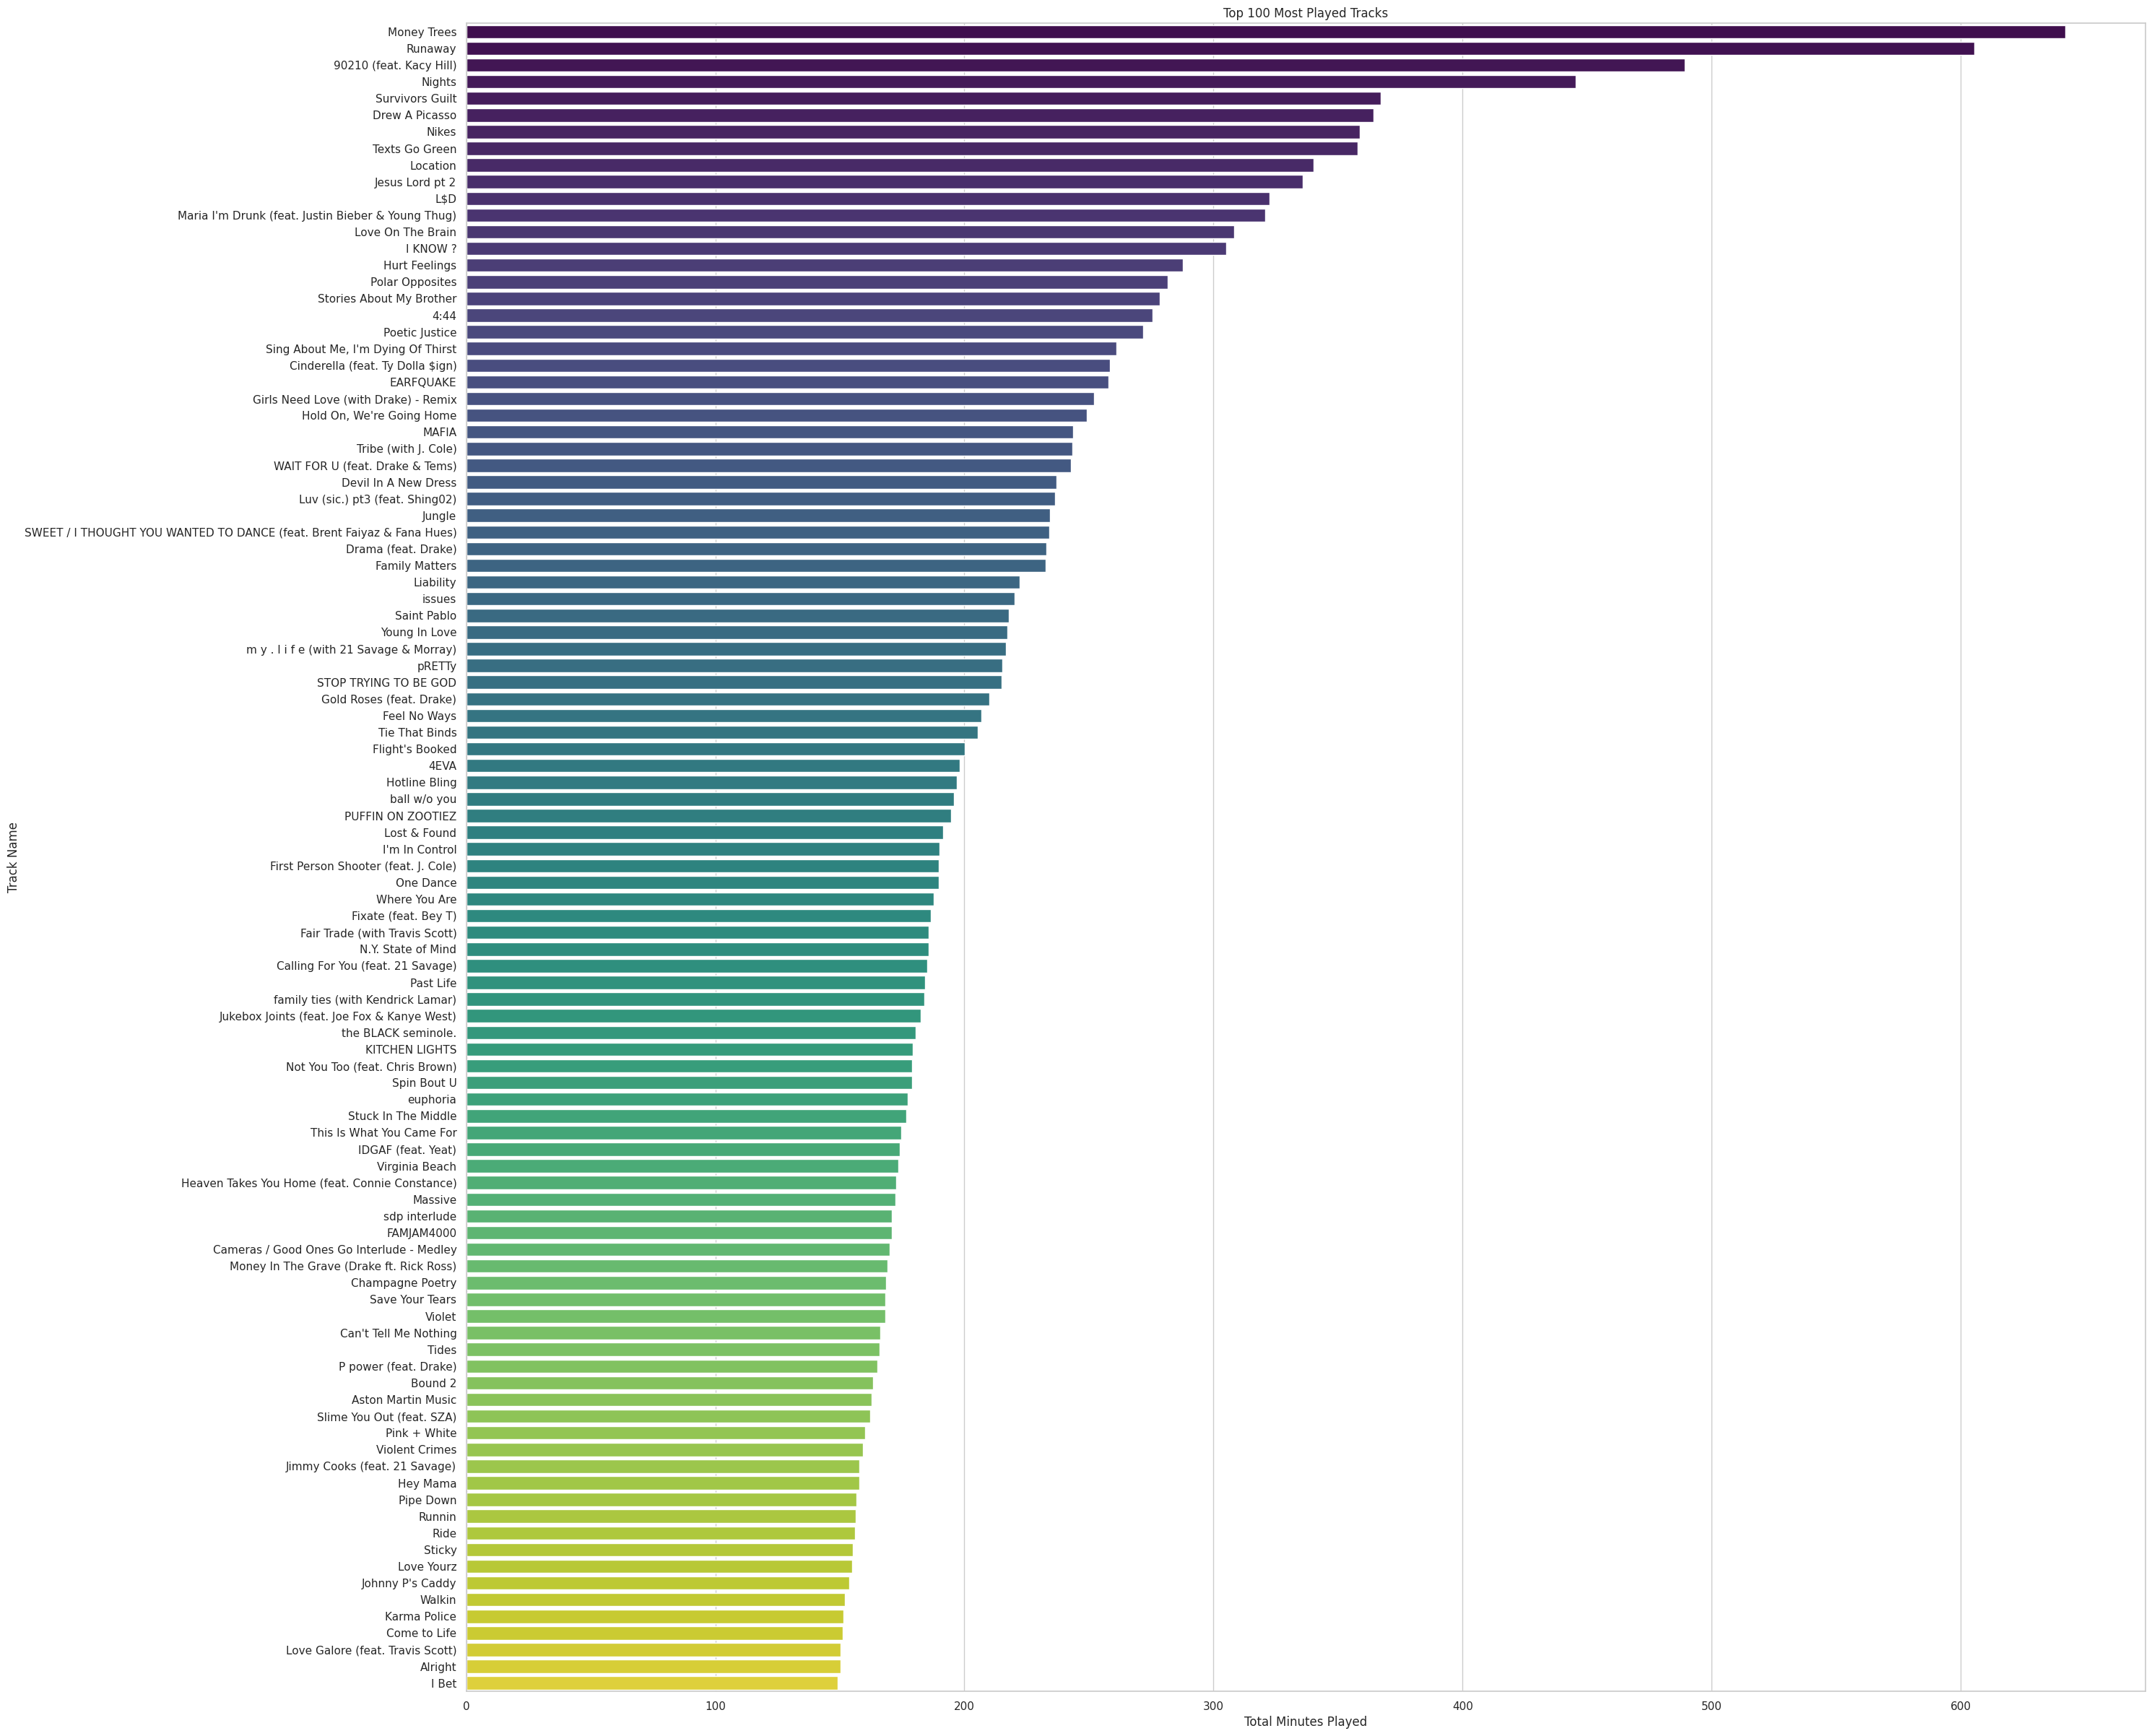

In [73]:
most_played_tracks = df.groupby("master_metadata_track_name")["minutes_played"].sum().nlargest(100)
plt.figure(figsize=(30, 30));
sns.barplot(x=most_played_tracks.values, y=most_played_tracks.index,
            palette="viridis");
plt.title("Top 100 Most Played Tracks")
plt.xlabel("Total Minutes Played")
plt.ylabel("Track Name")    #so basically this shows the top 50 most played songs of all time 

/tmp/ipykernel_7655/3843024803.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=most_played_artists.values, y=most_played_artists.index,


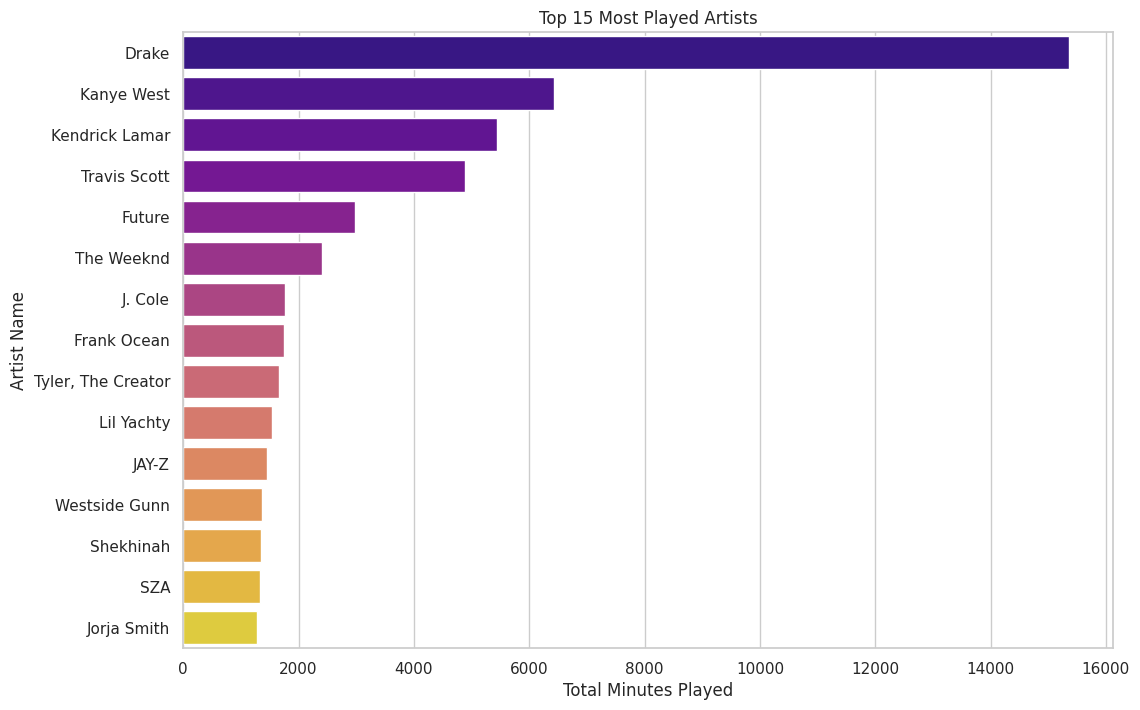

In [78]:
most_played_artists = df.groupby("master_metadata_album_artist_name")["minutes_played"].sum().nlargest(15)
plt.figure(figsize=(12, 8));
sns.barplot(x=most_played_artists.values, y=most_played_artists.index,
            palette="plasma");
plt.title("Top 15 Most Played Artists")
plt.xlabel("Total Minutes Played")
plt.ylabel("Artist Name")    #so basically this shows the top 10 most played artists
plt.show()  

In [ ]:
total_minutes_played = df["minutes_played"].sum()


In [94]:
print(f"That's about {total_minutes_played / 60 / 24:.2f} full days of listening time.")
print(f"The total minutes played across all tracks is: {total_minutes_played} minutes   ")
print(f"The total ammounnt of hours played is: {total_minutes_played / 60 :.2f} ")   



That's about 95.80 full days of listening time.
The total minutes played across all tracks is: 137958.66846666666 minutes   
The total ammounnt of hours played is: 2299.31 


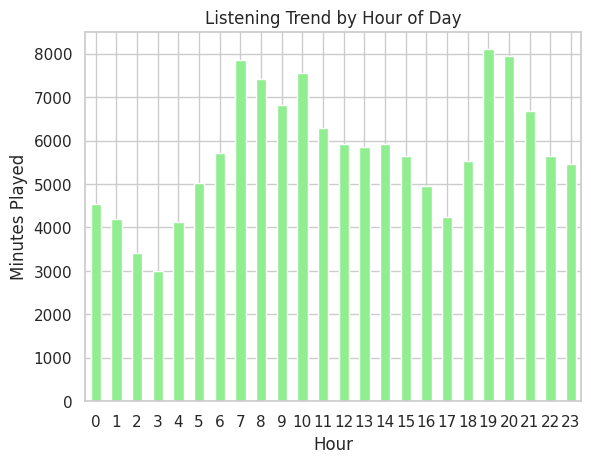

In [95]:
hourly_trend = combined_df.groupby("hour")["minutes_played"].sum()
hourly_trend.plot(kind="bar", title="Listening Trend by Hour of Day", color="lightgreen")
plt.ylabel("Minutes Played")
plt.xlabel("Hour")
plt.xticks(rotation=0)
plt.show()


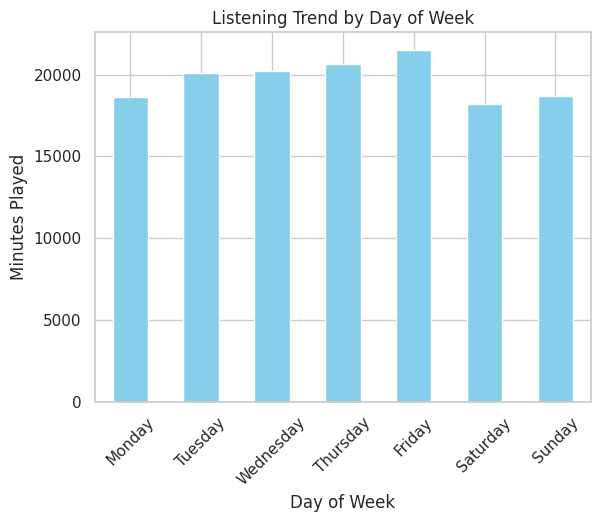

In [96]:
weekday_trend = combined_df.groupby("day_of_week")["minutes_played"].sum()
weekday_trend = weekday_trend.reindex(["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"])
weekday_trend.plot(kind="bar", title="Listening Trend by Day of Week", color="skyblue")
plt.ylabel("Minutes Played")
plt.xlabel("Day of Week")
plt.xticks(rotation=45)
plt.show();

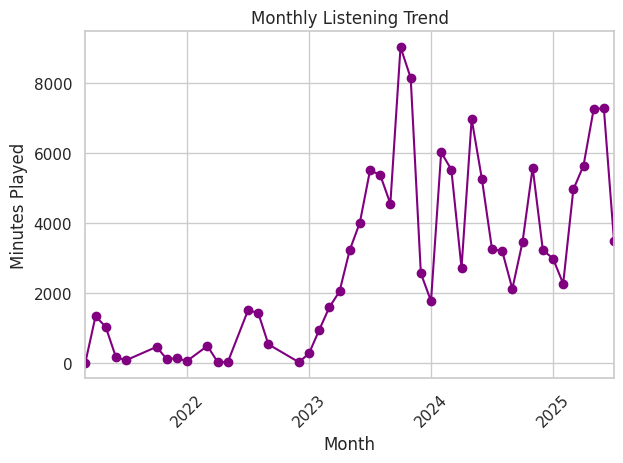

In [97]:
combined_df["month"] = pd.to_datetime(combined_df["date"]).dt.to_period("M")
monthly_trend = combined_df.groupby("month")["minutes_played"].sum()
monthly_trend.plot(kind="line", marker="o", title="Monthly Listening Trend", color="purple")
plt.ylabel("Minutes Played")
plt.xlabel("Month")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

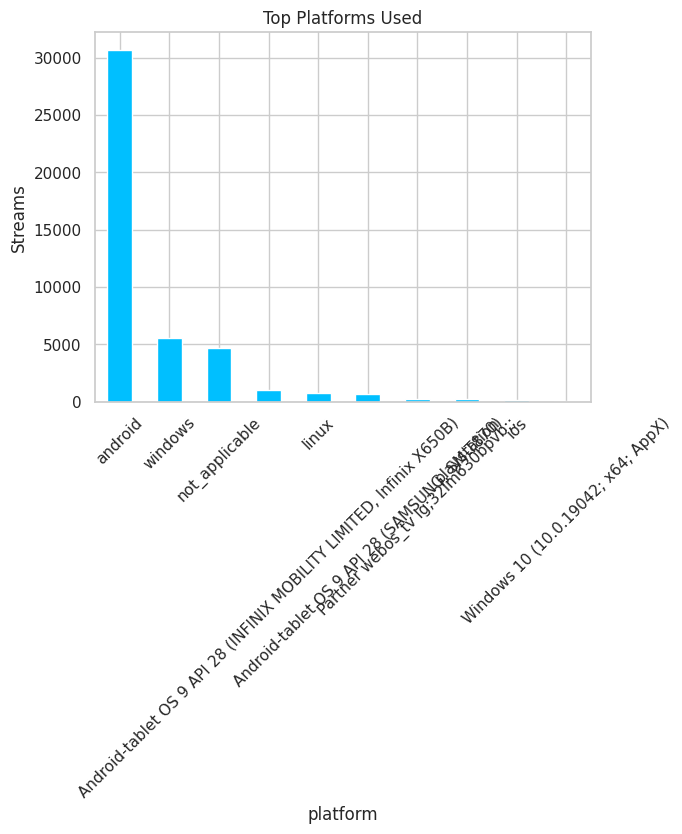

In [98]:
platform_usage = combined_df["platform"].value_counts().head(10)
platform_usage.plot(kind="bar", title="Top Platforms Used", color="deepskyblue")
plt.ylabel("Streams")
plt.xticks(rotation=45)
plt.show()

In [105]:

combined_df["timestamp"] = combined_df["timestamp"].dt.tz_localize(None)


from datetime import datetime

start_date = datetime(2024, 12, 4)
end_date = datetime(2025, 7, 31)

filtered_df = combined_df[
    (combined_df["timestamp"] >= start_date) &
    (combined_df["timestamp"] <= end_date)
]

# Continue analysis
filtered_minutes = filtered_df["minutes_played"].sum()
print(f" Total minutes played between dec 2024 and July 2025: {filtered_minutes:.2f} minutes ({filtered_minutes / 60:.2f} hours)")


 Total minutes played between dec 2024 and July 2025: 36407.45 minutes (606.79 hours)


In [108]:
combined_df['timestamp'] = pd.to_datetime(combined_df['timestamp'], utc=True)

start_date = pd.Timestamp(datetime(2024, 12, 4), tz='UTC')
end_date = pd.Timestamp(datetime(2025, 7, 20, 23, 59, 59), tz='UTC')

filtered_df = combined_df[
    (combined_df['timestamp'] >= start_date) &
    (combined_df['timestamp'] <= end_date)
]


top_artists = (
    filtered_df.groupby("master_metadata_album_artist_name")["minutes_played"]
    .sum()
    .sort_values(ascending=False)
    .head(5)
)

print(" Top 5 Artists (Dec 4, 2024 – July 20, 2025):")
print(top_artists)

top_songs = (
    filtered_df.groupby("master_metadata_track_name")["minutes_played"]
    .sum()
    .sort_values(ascending=False)
    .head(5)
)

print("\n Top 5 Songs (Dec 4, 2024 – July 20, 2025):")
print(top_songs)

 Top 5 Artists (Dec 4, 2024 – July 20, 2025):
master_metadata_album_artist_name
Drake             3738.581350
Kendrick Lamar    1622.033267
Kanye West        1449.136383
The Weeknd        1237.316867
Travis Scott       926.170133
Name: minutes_played, dtype: float64

 Top 5 Songs (Dec 4, 2024 – July 20, 2025):
master_metadata_track_name
Luv (sic.) pt3 (feat. Shing02)    236.385533
Violet                            167.873567
Karma Police                      151.513583
Runaway                           150.447033
Feel No Ways                      149.744033
Name: minutes_played, dtype: float64


In [109]:

combined_df["year"] = combined_df["timestamp"].dt.year

yearly_usage = (
    combined_df.groupby("year")["minutes_played"]
    .sum()
    .reset_index()
)

print(" Total Listening Time by Year:")
print(yearly_usage)




 Total Listening Time by Year:
   year  minutes_played
0  2021     3367.164900
1  2022     4123.819267
2  2023    47336.643333
3  2024    49192.638233
4  2025    33938.402733


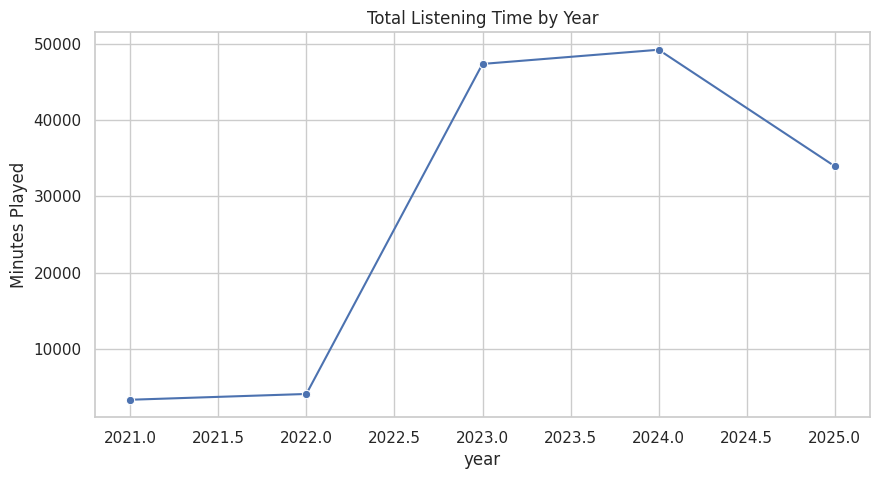

In [111]:


plt.figure(figsize=(10,5))
sns.lineplot(data=yearly_usage, x="year", y="minutes_played", marker="o")
plt.title("Total Listening Time by Year")
plt.ylabel("Minutes Played")
plt.grid(True)
plt.show();


In [112]:

combined_df["year"] = combined_df["timestamp"].dt.year

artist_yearly = (
    combined_df.groupby(["year", "master_metadata_album_artist_name"])["minutes_played"]
    .sum()
    .reset_index()
)


top_artists_per_year = (
    artist_yearly.sort_values(["year", "minutes_played"], ascending=[True, False])
    .groupby("year")
    .head(5)  
)


for year, group in top_artists_per_year.groupby("year"):
    print(f"\n Top Artists in {year}:")
    print(group[["master_metadata_album_artist_name", "minutes_played"]].reset_index(drop=True))



 Top Artists in 2021:
  master_metadata_album_artist_name  minutes_played
0                        The Weeknd       66.591417
1                             Drake       48.987800
2                              UB40       48.220600
3                         Sam Smith       39.907733
4                          Doja Cat       37.678950

 Top Artists in 2022:
  master_metadata_album_artist_name  minutes_played
0                             Drake       134.36420
1                        Kanye West        82.26465
2                              UB40        49.77845
3                               NSG        41.80360
4                            Gyakie        37.86100

 Top Artists in 2023:
  master_metadata_album_artist_name  minutes_played
0                             Drake     6048.428333
1                        Kanye West     2485.127300
2                      Travis Scott     1793.717483
3                    Kendrick Lamar     1306.726467
4                        Lil Yachty     1013.04

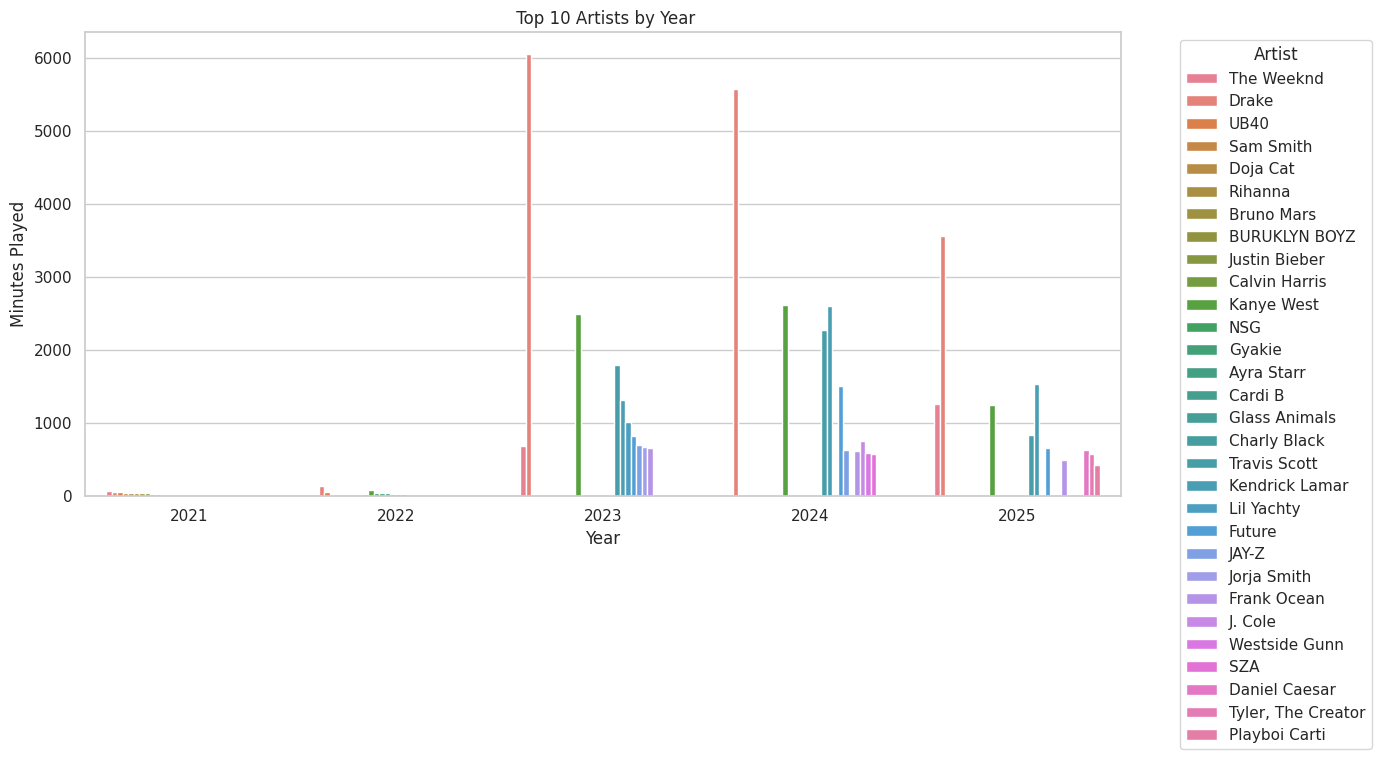

In [114]:


combined_df["year"] = combined_df["timestamp"].dt.year
artist_yearly = (
    combined_df.groupby(["year", "master_metadata_album_artist_name"])["minutes_played"]
    .sum()
    .reset_index()
)

top_artists_per_year = (
    artist_yearly.sort_values(["year", "minutes_played"], ascending=[True, False])
    .groupby("year")
    .head(10)
)

plt.figure(figsize=(14, 7))
sns.barplot(
    data=top_artists_per_year,
    x="year",
    y="minutes_played",
    hue="master_metadata_album_artist_name"
)
plt.title(" Top 10 Artists by Year")
plt.ylabel("Minutes Played")
plt.xlabel("Year")
plt.legend(title="Artist", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show();


/tmp/ipykernel_7655/237041920.py:16: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/home/elvis/spotify_cleaning/venv/lib/python3.12/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


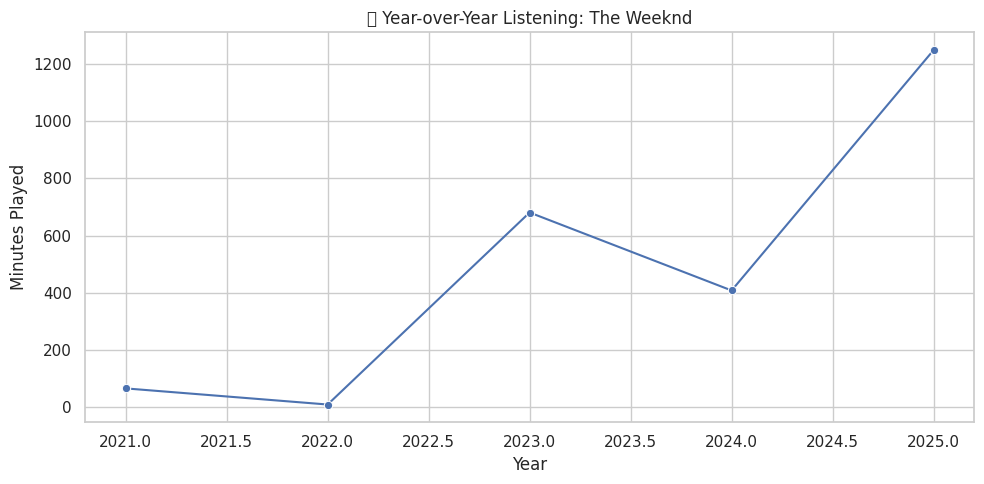

In [ ]:
artist_to_track = "The Weeknd"  

artist_growth = (
    combined_df[combined_df["master_metadata_album_artist_name"] == artist_to_track]
    .groupby("year")["minutes_played"]
    .sum()
    .reset_index()
)

plt.figure(figsize=(10, 5))
sns.lineplot(data=artist_growth, x="year", y="minutes_played", marker="o")
plt.title(f" Year-over-Year Listening: {artist_to_track}")
plt.ylabel("Minutes Played")
plt.xlabel("Year")
plt.grid(True)
plt.tight_layout()
plt.show();
# this just show like how my yout favourite artist grows over time since you  started listening to them